In [9]:
import nltk
import pandas as pd
import  matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#nltk comes with some data set that are necessary in order  to operate in certain ways
#if you want to see list of data set type "l"
#to download all the packages u can say ". download
#after this type "d" for downloads
#select your packages
#to quit this shell type "q"


nltk.download_shell()

In [3]:
#using line  method to just get the spam messages
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]


In [4]:
print(len(messages))

5574


In [5]:
#checking 1st messages
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [6]:
messages[50]

'ham\tWhat you thinked about me. First time you saw me in class.'

In [7]:
#print 1st 10 messages and number them as enumerate
for message_no, message in enumerate(messages[:10]):
    print(message_no, message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

In [10]:
#detect which are text messages(ham) and which are spam messages
messages=pd.read_csv('smsspamcollection/SMSSpamCollection',sep="\t",names=["label","messages"])

In [11]:
messages.head()

,label,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
messages.describe()

,label,messages
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [13]:
messages.groupby('label').describe()

messages                                                               
         count unique                                                top freq
label                                                                        
ham       4825   4516                             Sorry, I'll call later   30
spam       747    653  Please call our customer service representativ...    4

In [14]:
messages['length'] = messages['messages'].apply(len)


In [15]:
messages.head()

,label,messages,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


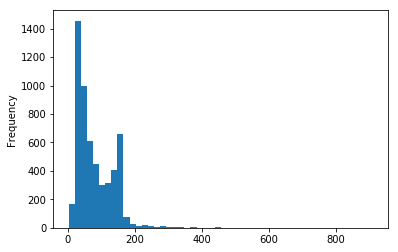

In [16]:
messages['length'].plot.hist(bins=50)

In [17]:
messages.length.describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [18]:
messages[messages['length'] == 910]['messages'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000871A697EB8>,
      dtype=object)

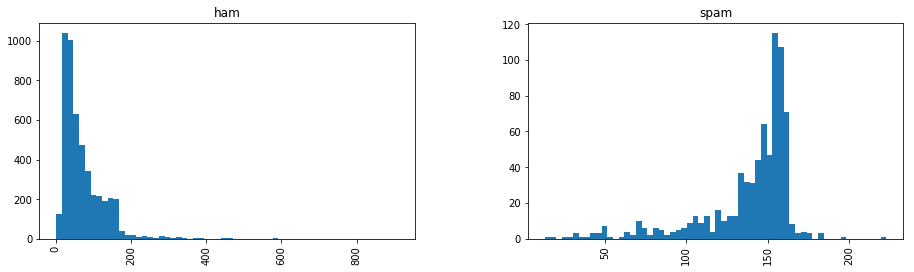

In [19]:
#checking whether message length is a distinguishing feature between ham and spam:
messages.hist(column='length', by='label', bins=60,figsize=(15,4))

In [20]:
#TEXT PRE PROCESSING

In [21]:
import string

In [22]:
#taking a msg with punctuation and removing it
#EXAMPLE
mess="sample message ! notice: it has punctuations"

In [23]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [24]:
tk=[c for c in mess if c not in string.punctuation]

In [25]:
tk

['s',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'm',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 ' ',
 'n',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 'i',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n',
 's']

In [26]:
#removing stop words
from nltk.corpus import stopwords

In [27]:
#some stopwords
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [28]:
#joining the above list
tk="".join(tk)

In [29]:
tk

'sample message  notice it has punctuations'

In [30]:
tk.split()

['sample', 'message', 'notice', 'it', 'has', 'punctuations']

In [31]:
clean_mess=[word for word in tk.split() if word.lower() not in stopwords.words("english")]

In [32]:
clean_mess

['sample', 'message', 'notice', 'punctuations']

In [35]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
     # Check characters to see if they are in punctuation
    tk = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    tk = ''.join(tk)
    
    # Now just remove any stopwords
    return [word for word in tk.split() if word.lower() not in stopwords.words('english')]

In [36]:
#we are going to tokenise these messages and tokenisation is just a term use to describe the we did above
#converting normal text string into a lit of tokens 
messages.head()

,label,messages,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [37]:
messages["messages"].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: messages, dtype: object

In [38]:
#vectorisation
from sklearn.feature_extraction.text import CountVectorizer

In [39]:

bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['messages'])



In [40]:
print(len(bow_transformer.vocabulary_))

11425


In [41]:
mess4 = messages['messages'][3]


In [42]:
print(mess4)

U dun say so early hor... U c already then say...


In [43]:
bow4 = bow_transformer.transform([mess4])


In [44]:
print(bow4)


  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [45]:
print(bow4.shape)

(1, 11425)


In [46]:
print(bow_transformer.get_feature_names()[4068])
print(bow_transformer.get_feature_names()[9554])

U
say


In [47]:
messages_bow = bow_transformer.transform(messages['messages'])

In [48]:
print('Shape of Sparse Matrix: ', messages_bow.shape)

Shape of Sparse Matrix:  (5572, 11425)


In [51]:
print('Amount of Non-Zero occurences: ', messages_bow.nnz)

Amount of Non-Zero occurences:  50548


In [54]:
#no. of non zero messages vs total no. of messages
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format((sparsity)))

sparsity: 0.07940295412668218


In [55]:
from sklearn.feature_extraction.text import TfidfTransformer

In [56]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [57]:
tfidf4 = tfidf_transformer.transform(bow4)

In [60]:
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [61]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['u']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['university']])

3.2800524267409408
8.527076498901426


In [62]:
#To transform the entire bag-of-words corpus into TF-IDF corpus at once:
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(5572, 11425)


In [63]:
from sklearn.naive_bayes import MultinomialNB

In [64]:
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])

In [65]:
print('predicted:', spam_detect_model.predict(tfidf4)[0])

predicted: ham


In [66]:
print('expected:', messages.label[3])

expected: ham


In [67]:
all_predictions = spam_detect_model.predict(messages_tfidf)
print(all_predictions)

['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


In [68]:
print(all_predictions)

['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


In [69]:
from sklearn.model_selection import train_test_split



In [73]:
msg_train, msg_test, label_train, label_test = train_test_split(messages['messages'], messages['label'], test_size=0.3)



In [74]:
print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

3900 1672 5572


In [75]:
#we will use this method on real world data set not the above process as this will save our time
from sklearn.pipeline import Pipeline



In [76]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [77]:
 pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x000000871AB83F28>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocesso...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [78]:
predictions = pipeline.predict(msg_test)

In [79]:
from sklearn.metrics import classification_report


In [80]:
print (classification_report(messages['label'], all_predictions))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      4825
        spam       1.00      0.85      0.92       747

   micro avg       0.98      0.98      0.98      5572
   macro avg       0.99      0.92      0.95      5572
weighted avg       0.98      0.98      0.98      5572



In [81]:
#doing with randomforest
from sklearn.ensemble import RandomForestClassifier

In [86]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', RandomForestClassifier()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [87]:
 pipeline.fit(msg_train,label_train)

C:\Users\pc\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x000000871AB83F28>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocesso...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [88]:
predictions = pipeline.predict(msg_test)

In [89]:
print (classification_report(messages['label'], all_predictions))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      4825
        spam       1.00      0.85      0.92       747

   micro avg       0.98      0.98      0.98      5572
   macro avg       0.99      0.92      0.95      5572
weighted avg       0.98      0.98      0.98      5572

